# 1.データの読み込み(確認)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


# 2.データ探索(EDA)

In [77]:
train.info()
train.isnull().sum()
train.shape
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           900 non-null    int64  
 1   gender                       900 non-null    object 
 2   race/ethnicity               900 non-null    object 
 3   parental level of education  900 non-null    object 
 4   lunch                        900 non-null    object 
 5   test preparation course      297 non-null    object 
 6   reading score                900 non-null    int64  
 7   writing score                892 non-null    float64
 8   math score                   900 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 63.4+ KB


,ID,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
count,900.000000,900,900,900,900,297,900.000000,892.000000,900.000000
unique,NaN,2,5,6,2,1,NaN,NaN,NaN
top,NaN,male,group C,some college,standard,completed,NaN,NaN,NaN
freq,NaN,463,292,192,592,297,NaN,NaN,NaN
mean,499.837778,NaN,NaN,NaN,NaN,NaN,68.824444,67.591928,66.346667
std,287.676798,NaN,NaN,NaN,NaN,NaN,14.764758,15.611568,15.221897
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,13.000000
25%,249.750000,NaN,NaN,NaN,NaN,NaN,59.750000,58.000000,56.000000
50%,501.500000,NaN,NaN,NaN,NaN,NaN,70.000000,68.000000,67.000000
75%,746.250000,NaN,NaN,NaN,NaN,NaN,79.000000,79.000000,77.000000


<Axes: xlabel='math score', ylabel='Count'>

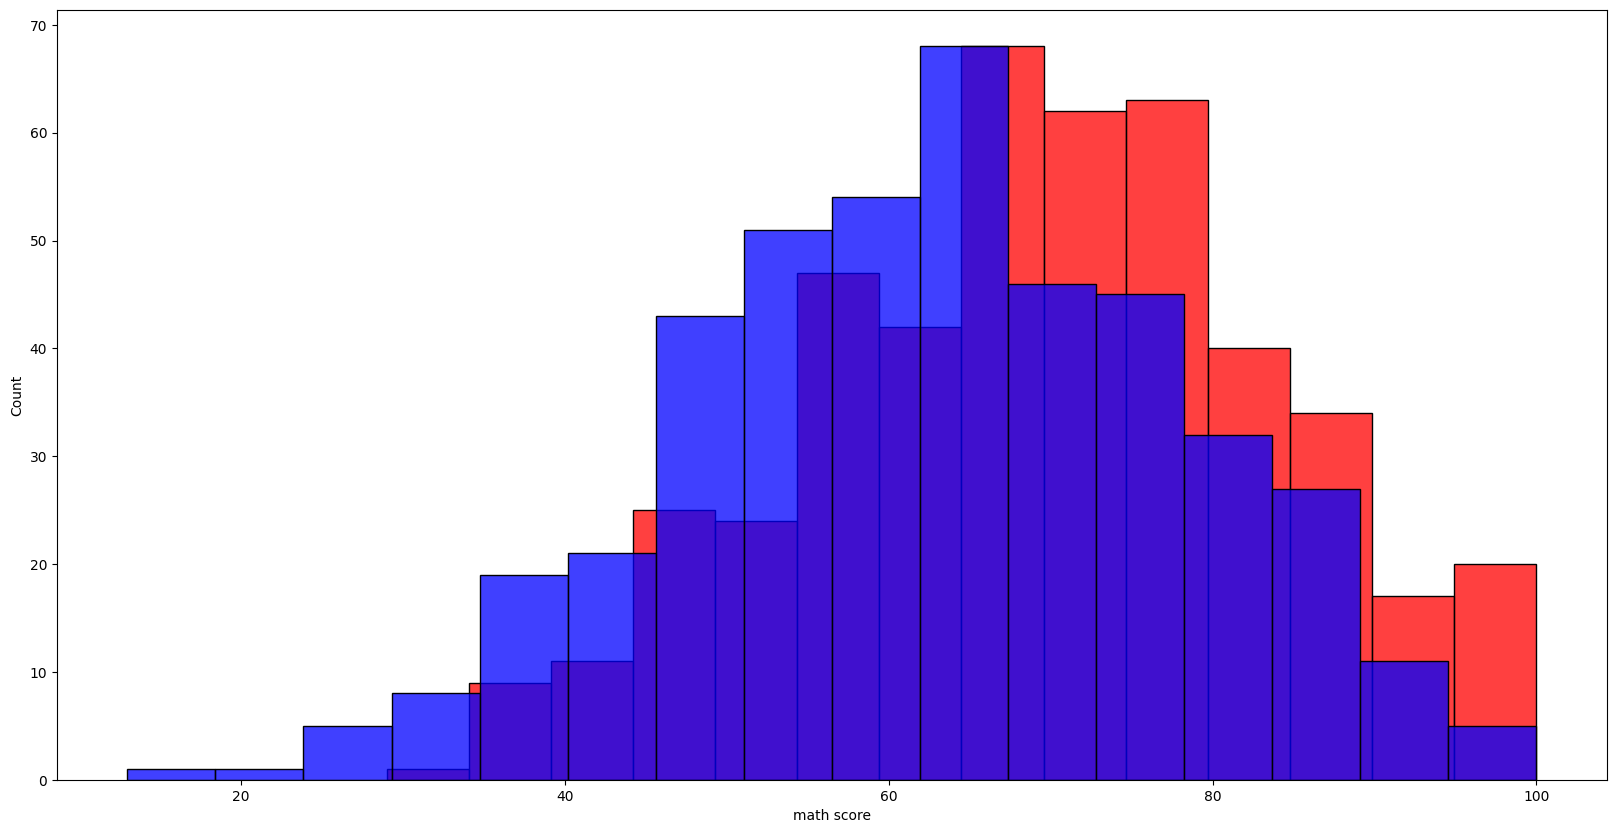

In [78]:
# gender
fig = plt.subplots(figsize=(20,10))
sns.histplot(train.query('gender =="male"')['math score'],kde=False,label='male',color='red')
sns.histplot(train.query('gender =="female"')['math score'],kde=False,label='male',color='blue')


race/ethnicity,group A,group B,group C,group D,group E
count,74.000000,184.000000,292.000000,235.000000,115.00000
mean,65.108108,63.163043,63.431507,69.106383,74.00000
std,13.961363,14.228254,14.960616,14.733580,15.70395
min,33.000000,25.000000,23.000000,13.000000,33.00000
25%,54.250000,53.000000,53.750000,60.500000,63.00000
50%,65.500000,63.000000,64.000000,70.000000,75.00000
75%,77.000000,74.250000,74.000000,80.000000,86.00000
max,94.000000,99.000000,100.000000,100.000000,100.00000


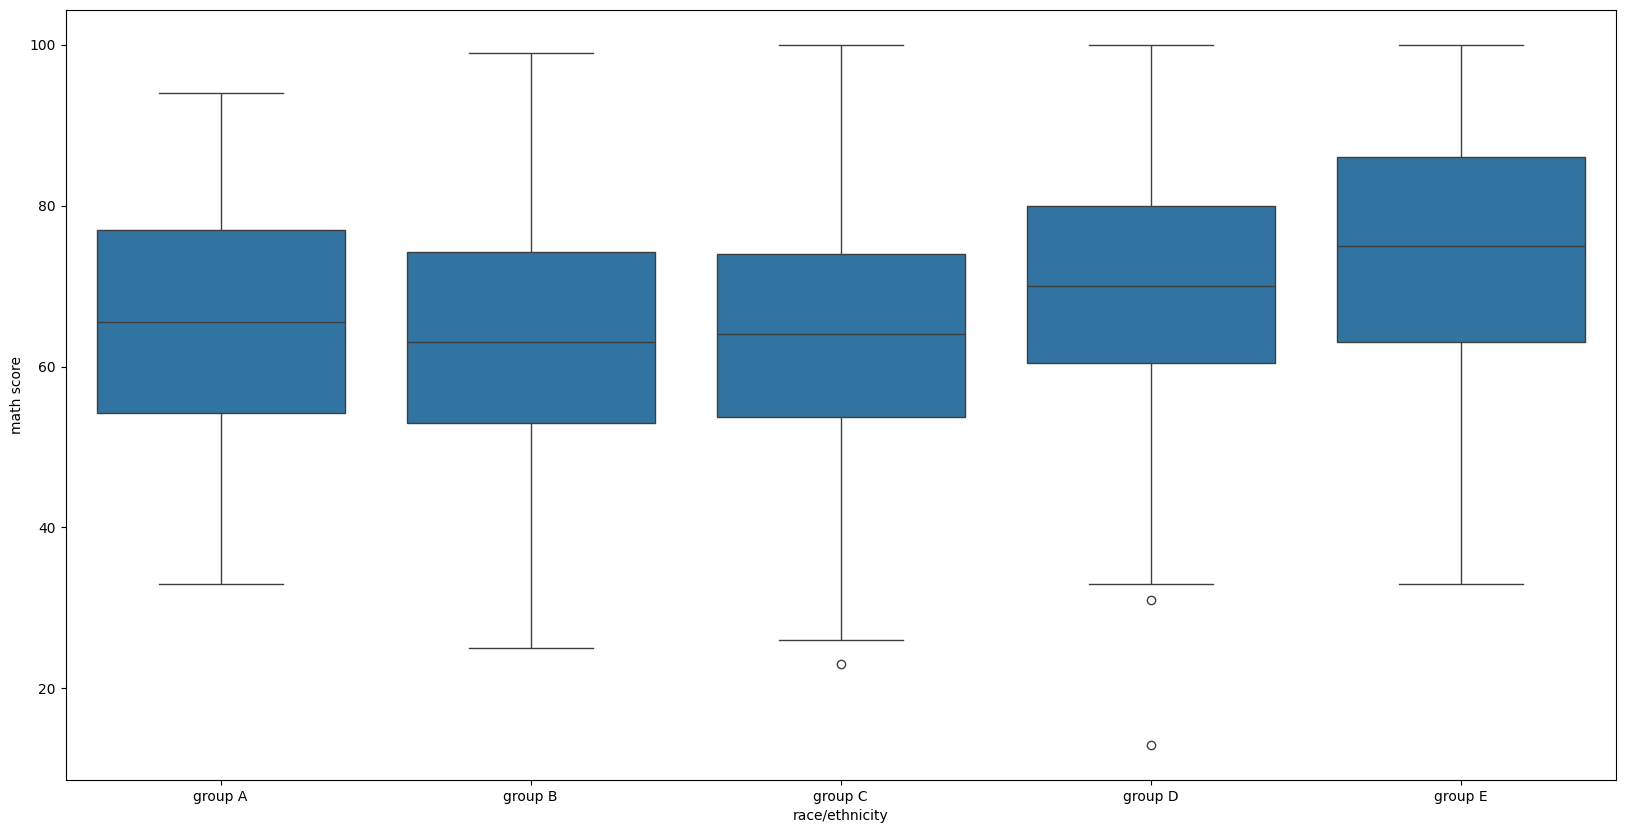

In [79]:
# race(人種)
# 5つある場合はhistplotではなく、箱ひげ図
fig = plt.subplots(figsize=(20,10))
sns.boxplot(x='race/ethnicity',y='math score',data=train,order=['group A','group B','group C','group D','group E'])
train.groupby('race/ethnicity').describe()['math score'].T

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
count,187.000000,101.000000,183.000000,62.000000,192.000000,175.000000
mean,69.614973,71.534653,65.114754,72.016129,65.348958,60.234286
std,14.062510,15.417240,13.898097,14.991245,15.183282,15.376762
min,23.000000,35.000000,29.000000,38.000000,13.000000,25.000000
25%,60.000000,61.000000,55.000000,61.250000,55.000000,50.000000
50%,70.000000,71.000000,66.000000,71.000000,66.000000,59.000000
75%,78.000000,84.000000,75.000000,84.000000,77.000000,70.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,97.000000


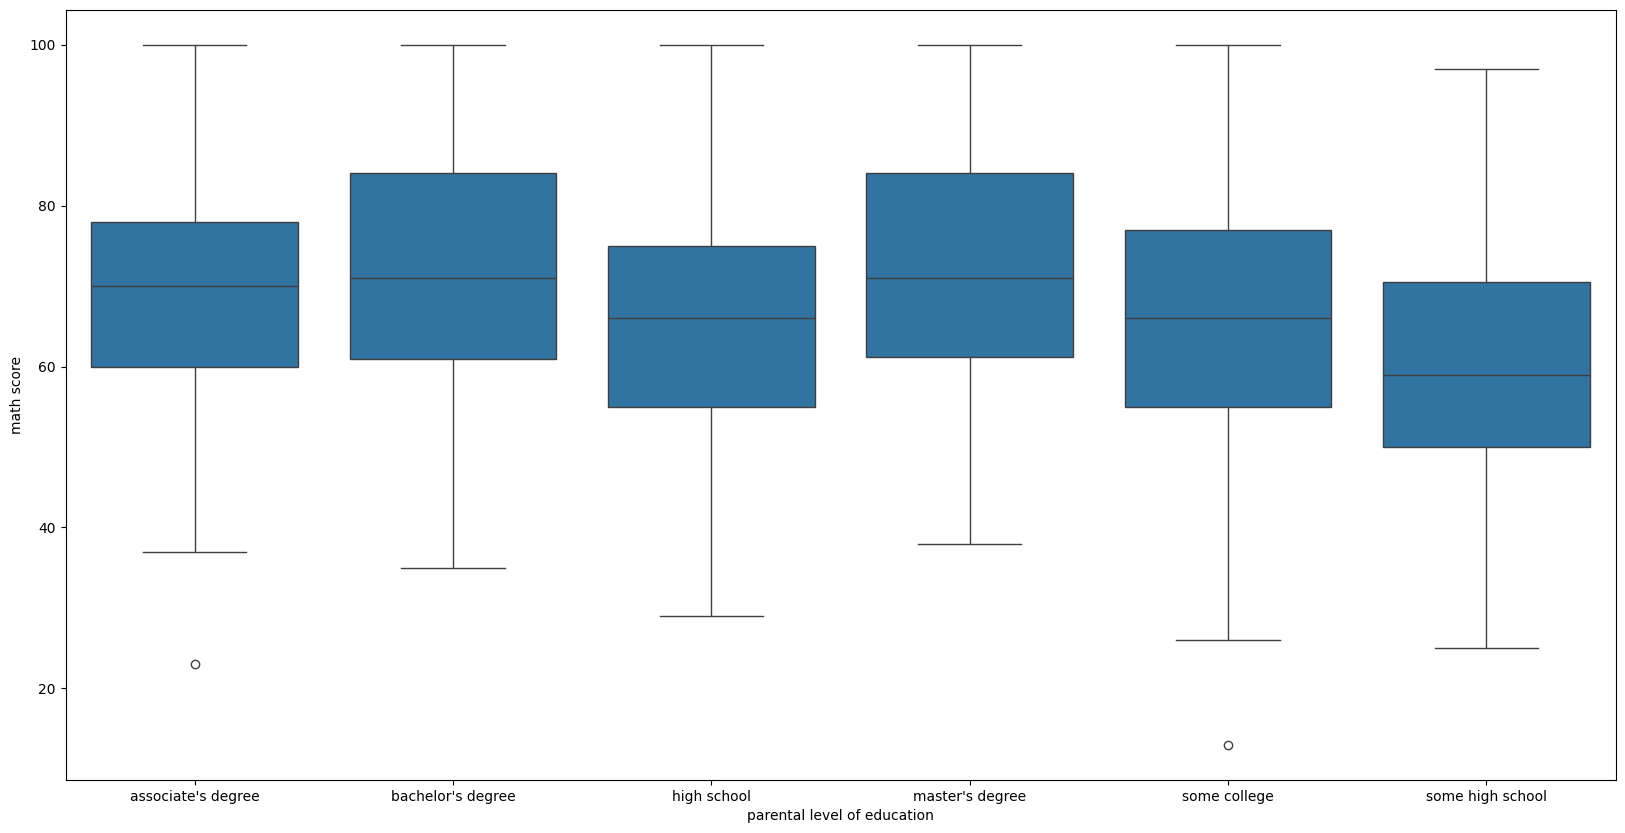

In [80]:
# parental level of education
fig = plt.subplots(figsize=(20,10))
sns.boxplot(x='parental level of education',y='math score',data=train,order=["associate's degree","bachelor's degree","high school","master's degree","some college", "some high school"])


train.groupby('parental level of education').describe()['math score'].T


<Axes: xlabel='math score', ylabel='Count'>

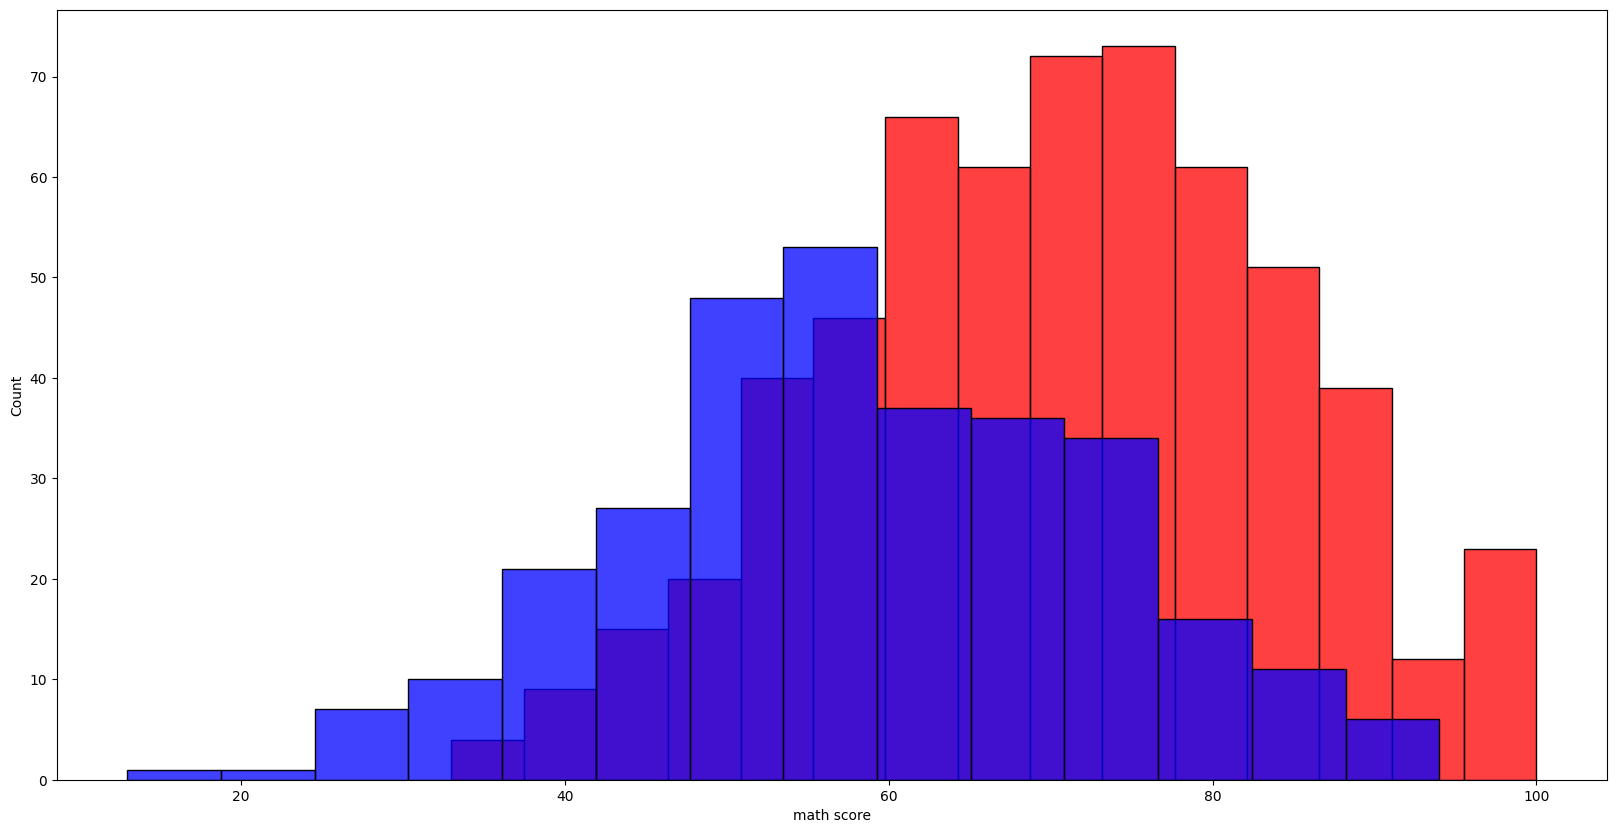

In [74]:
# lunch
fig = plt.subplots(figsize=(20,10))
sns.histplot(train.query('lunch == "standard"')['math score'],kde=False,label='standard',color='red')
sns.histplot(train.query('lunch == "free/reduced"')['math score'],kde=False,label='standard',color='blue')


In [83]:
# testpreparation courseの検証
# まずはtest preparaion courseにどんな値が含まれているかを確認
display(train['test preparation course'].unique())
#nanとcopletedしかないためcompleteしていない子達はnanになっていると推測できる

array([nan, 'completed'], dtype=object)

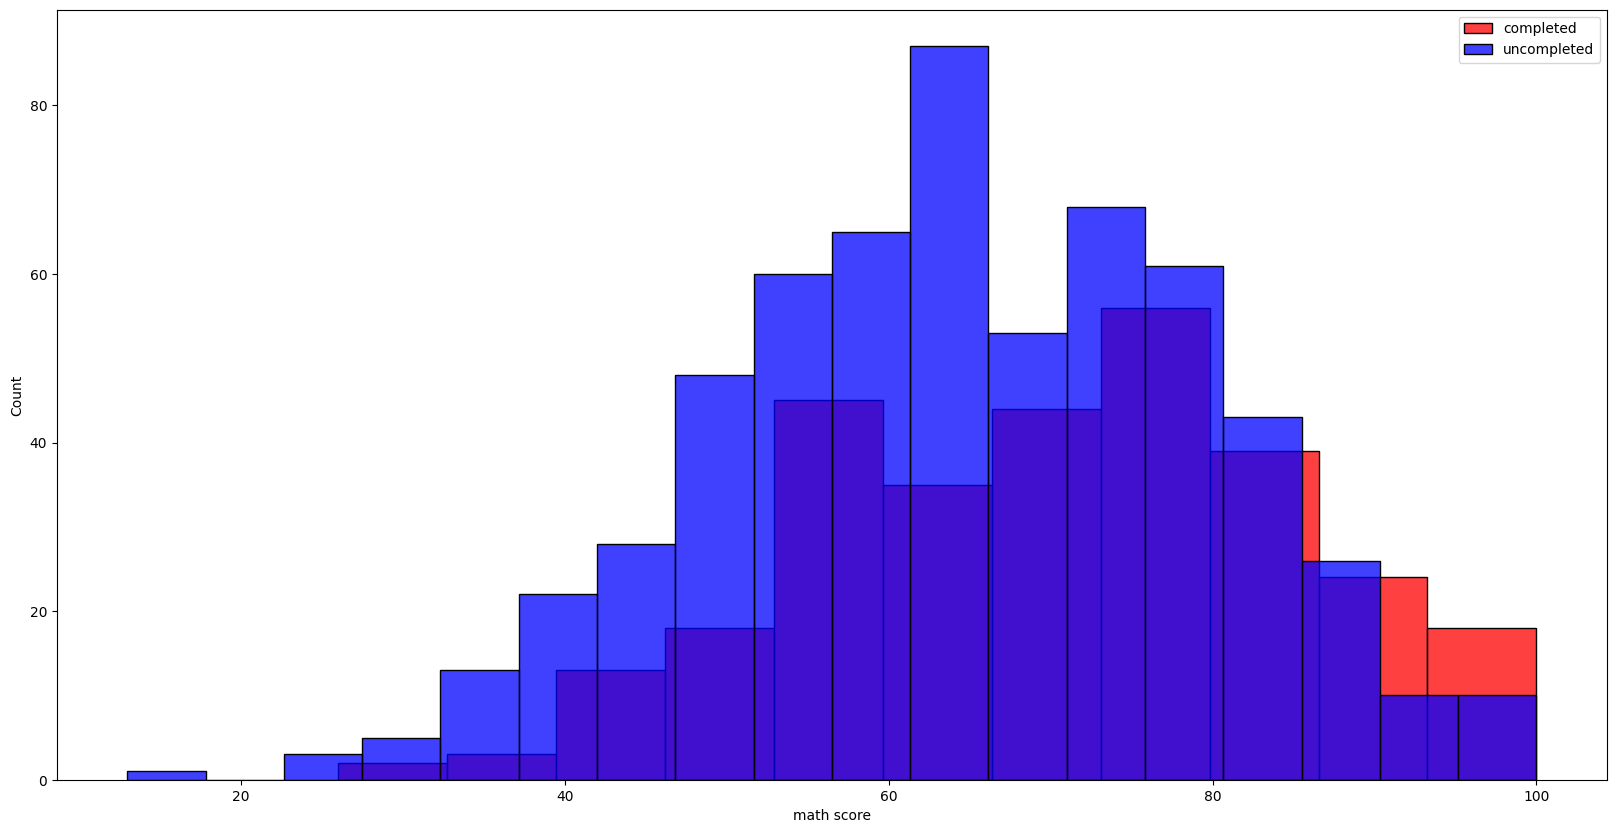

In [85]:
#completedとnanでmath_scoreを比較
fig = plt.subplots(figsize=(20,10))
sns.histplot(train.query('`test preparation course` == "completed"')['math score'],kde=False,label='completed',color='red')
sns.histplot(train.query('`test preparation course` != "completed"')["math score"], kde=False, label="uncompleted", color="blue")

plt.legend()

In [92]:
# reading score,writingscoreが0のデータの調整
train.query('`reading score` == 0 or `writing score` == 0')

,ID,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
728,200,female,group D,associate's degree,standard,completed,0,0.0,50


PearsonRResult(statistic=np.float64(0.8069848734519176), pvalue=np.float64(1.3217520412605702e-207))

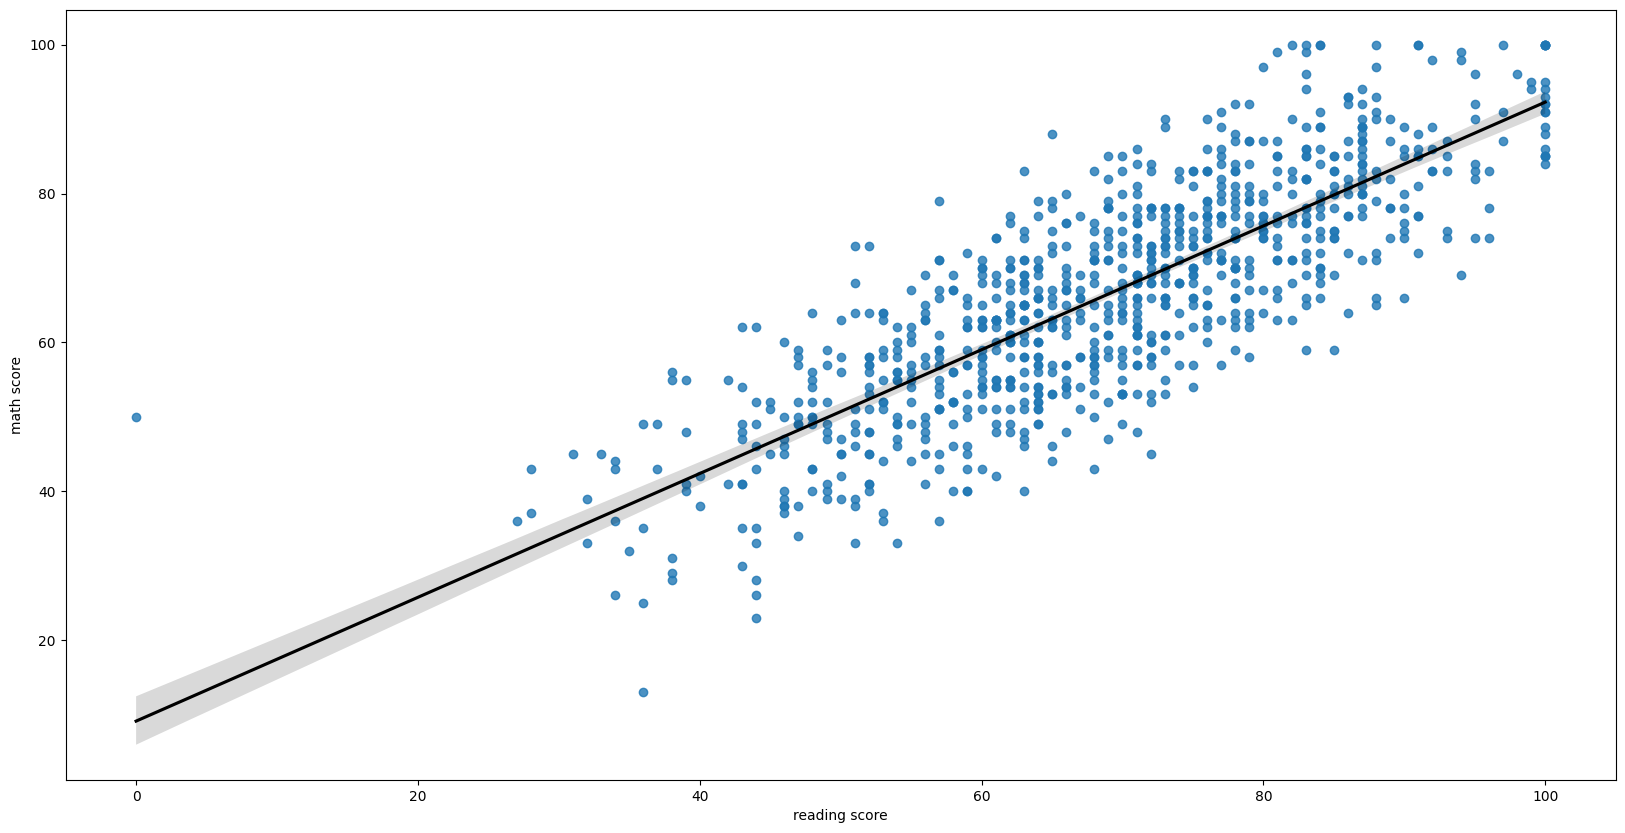

In [94]:
#reading score
fig = plt.subplots(figsize=(20,10))
sns.regplot(data=train,x='reading score',y='math score',line_kws={"color":"black"})

#相関関係の算出 + 検定の実施
from scipy import stats
stats.pearsonr(train["reading score"],train['math score'])
#reading scoreとmath scoreには強い正の相関関係を認める

PearsonRResult(statistic=np.float64(nan), pvalue=np.float64(nan))

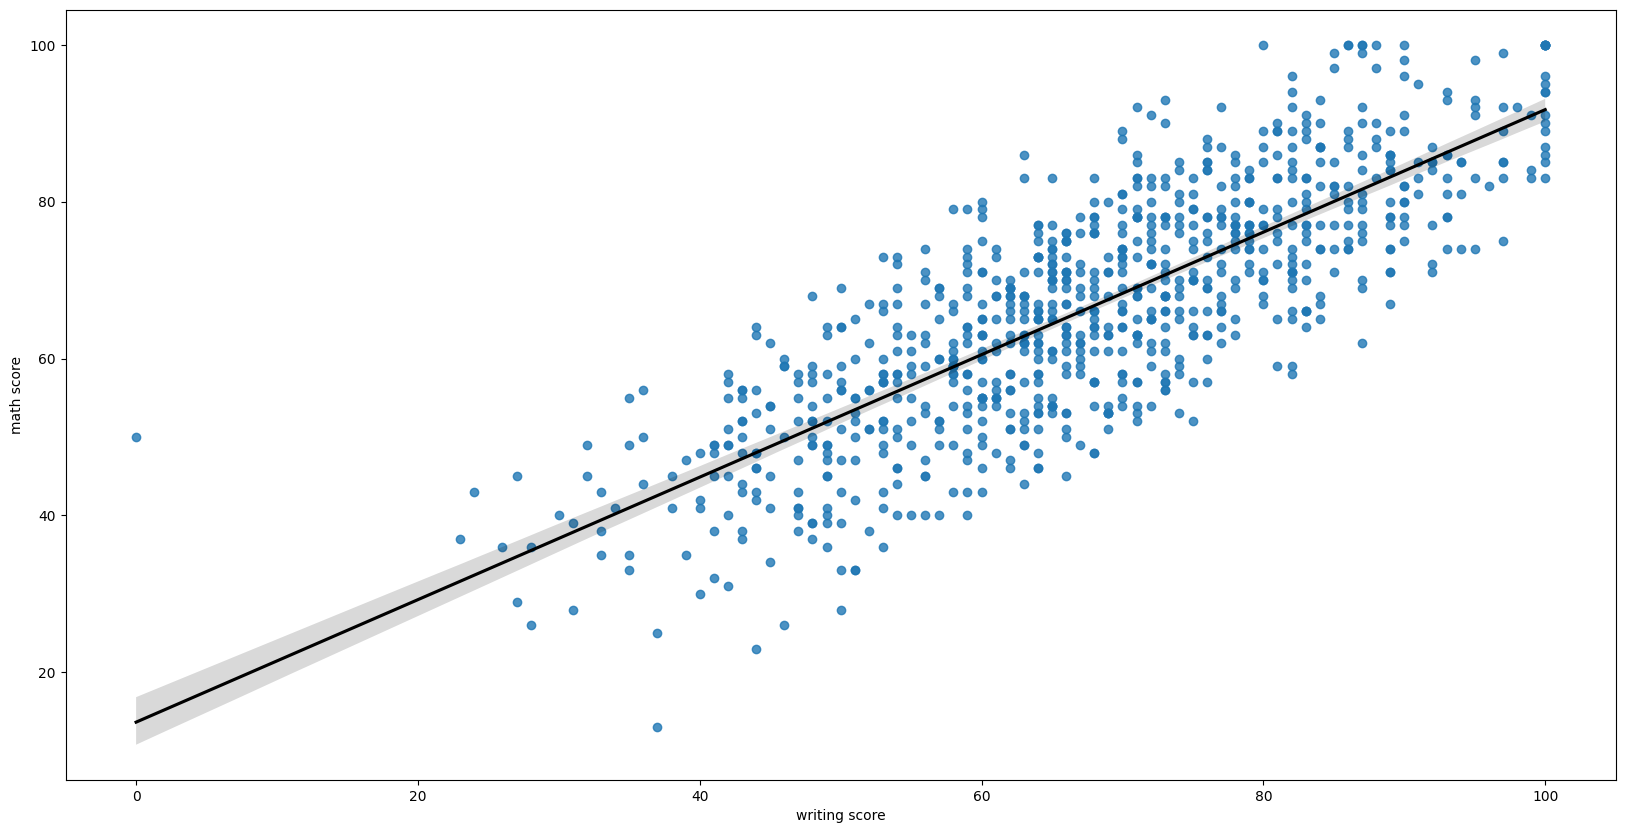

In [95]:
#writing score
fig = plt.subplots(figsize=(20,10))
sns.regplot(data=train,x='writing score',y='math score',line_kws={"color":"black"})

#相関関係の算出 + 検定の実施
from scipy import stats
stats.pearsonr(train["writing score"].fillna(np.mean(train['writing score'])),train['math score'])
#reading scoreとmath scoreには強い正の相関関係を認める

PearsonRResult(statistic=np.float64(0.9522291515066902), pvalue=np.float64(0.0))

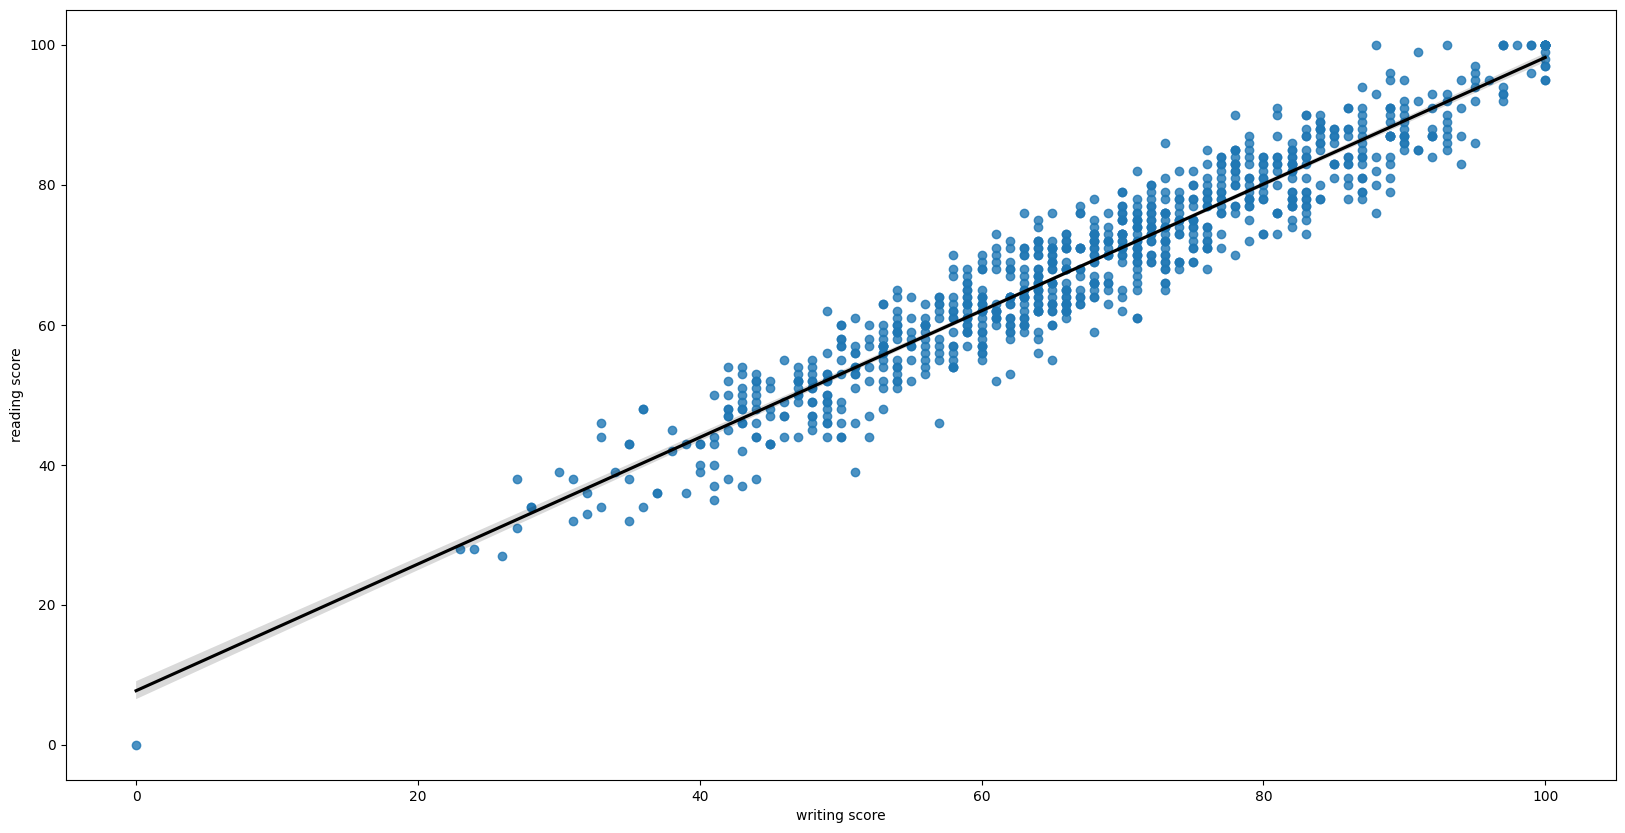

In [100]:
#readingとwritingの相関を調べる
fig = plt.subplots(figsize=(20,10))
sns.regplot(data=train,x="writing score",y="reading score",line_kws={"color":"black"})

from scipy import stats
stats.pearsonr(train["writing score"].fillna(np.mean(train["writing score"])),train["reading score"])

PearsonRResult(statistic=np.float64(0.8113538125631552), pvalue=np.float64(1.3340256238719585e-211))

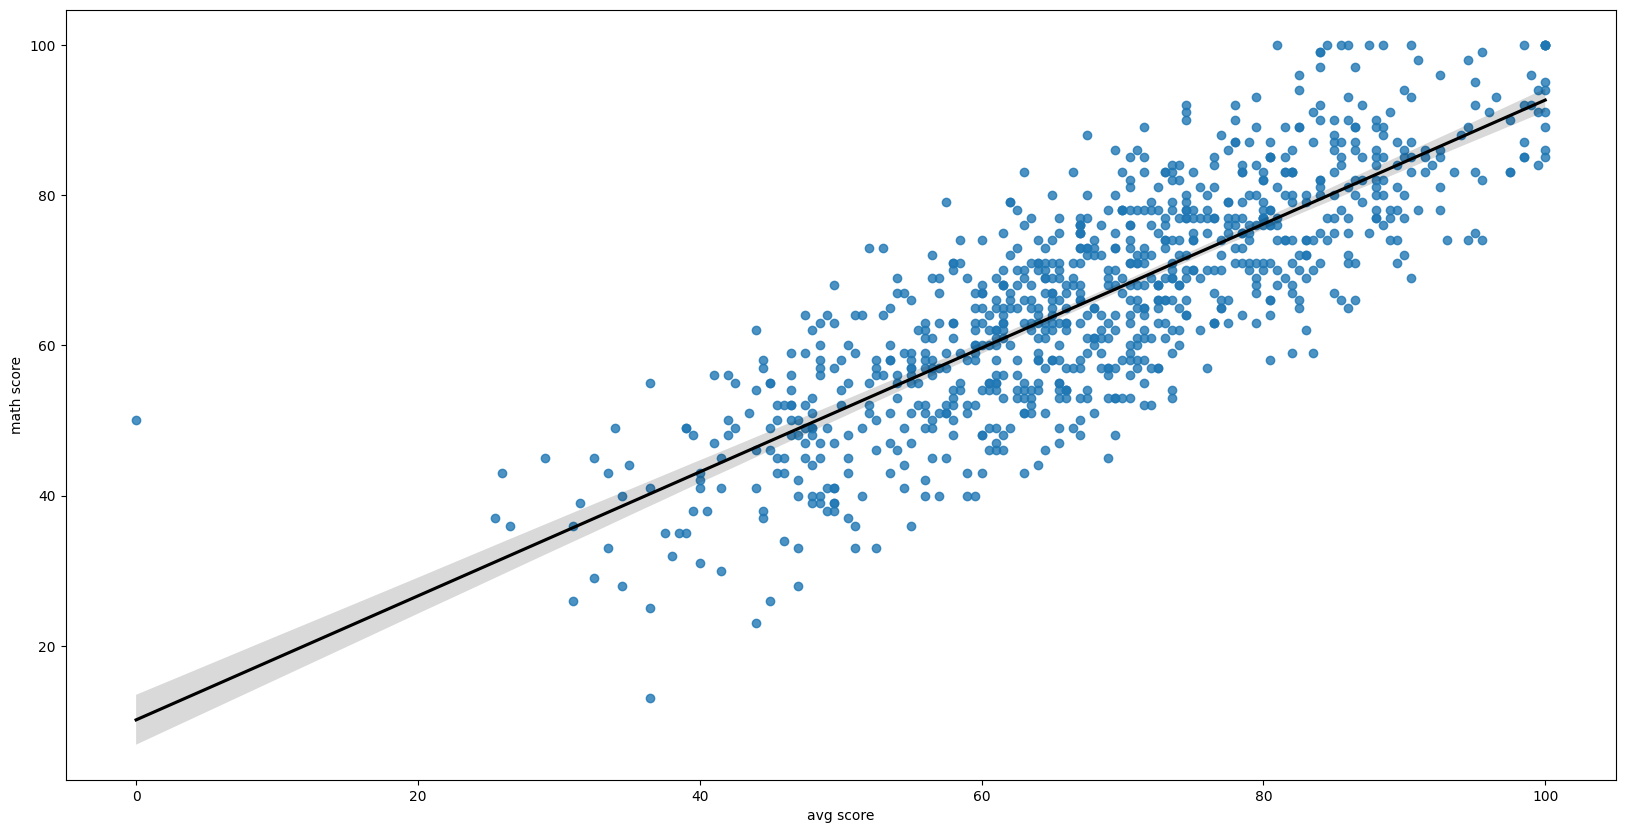

In [135]:
#readingscoreとwriting scoreの平均値とmath scoreの相関関係を検証
x = train.copy()
x["avg score"] = (train["reading score"] + train["writing score"])/2
fig = plt.subplots(figsize=(20,10))
sns.regplot(data=x,x='avg score',y='math score',line_kws={"color":"black"})


#相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(np.where(x['avg score'] == x["avg score"],x["avg score"],x["reading score"]),x['math score'])

# 3.機械学習の前処理

In [136]:
#変数の再確認
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           900 non-null    int64  
 1   gender                       900 non-null    object 
 2   race/ethnicity               900 non-null    object 
 3   parental level of education  900 non-null    object 
 4   lunch                        900 non-null    object 
 5   test preparation course      297 non-null    object 
 6   reading score                900 non-null    int64  
 7   writing score                892 non-null    float64
 8   math score                   900 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 63.4+ KB


In [137]:
train.head(10)

,ID,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,247,male,group D,some high school,standard,NaN,71,61.0,68
1,502,male,group D,associate's degree,standard,NaN,57,59.0,71
2,25,male,group C,high school,free/reduced,NaN,45,42.0,51
3,244,male,group B,some high school,standard,NaN,34,28.0,36
4,652,female,group C,some high school,standard,completed,100,97.0,92
5,694,male,group D,some college,standard,completed,95,90.0,96
6,599,female,group C,some high school,standard,completed,86,90.0,77
7,522,male,group D,associate's degree,standard,NaN,74,71.0,78
8,890,male,group B,high school,free/reduced,NaN,57,50.0,51
9,513,female,group C,master's degree,standard,completed,79,89.0,71


In [149]:
#機械学習用のデータフレームを作成
df_train = train.copy()
df_test = test.copy()

#IDは削除
df_train = df_train.drop("ID",axis=1)

#gender 男性を1、女性を0に
df_train["gender"] = df_train["gender"].apply(lambda x: 1 if x == "male" else 0)
df_test["gender"] = df_test["gender"].apply(lambda x: 1 if x == "male" else 0)

#race/ethnicity それぞれのカテゴリーでダミー化
df_train["race/ethnicity_A"] = df_train["race/ethnicity"].apply(lambda x: 1 if x == "group A" else 0)
df_train["race/ethnicity_B"] = df_train["race/ethnicity"].apply(lambda x: 1 if x == "group B" else 0)
df_train["race/ethnicity_C"] = df_train["race/ethnicity"].apply(lambda x: 1 if x == "group C" else 0)
df_train["race/ethnicity_D"] = df_train["race/ethnicity"].apply(lambda x: 1 if x == "group D" else 0)
df_train = df_train.drop("race/ethnicity",axis=1)
df_test["race/ethnicity_A"] = df_test["race/ethnicity"].apply(lambda x: 1 if x == "group A" else 0)
df_test["race/ethnicity_B"] = df_test["race/ethnicity"].apply(lambda x: 1 if x == "group B" else 0)
df_test["race/ethnicity_C"] = df_test["race/ethnicity"].apply(lambda x: 1 if x == "group C" else 0)
df_test["race/ethnicity_D"] = df_test["race/ethnicity"].apply(lambda x: 1 if x == "group D" else 0)
df_test = df_test.drop("race/ethnicity",axis=1)

#parental level of education　それぞれのカテゴリーでダミー化
df_train["parental level of education_some_high"] = df_train["parental level of education"].apply(lambda x: 1 if x == "some high school" else 0)
df_train["parental level of education_associate"] = df_train["parental level of education"].apply(lambda x: 1 if x == "associate's degree" else 0)
df_train["parental level of education_some_college"] = df_train["parental level of education"].apply(lambda x: 1 if x == "some college" else 0)
df_train["parental level of education_master"] = df_train["parental level of education"].apply(lambda x: 1 if x == "master's degree" else 0)
df_train["parental level of education_bachelor"] = df_train["parental level of education"].apply(lambda x: 1 if x == "bachelor's degree" else 0)
df_train = df_train.drop("parental level of education",axis=1)
df_test["parental level of education_some_high"] = df_test["parental level of education"].apply(lambda x: 1 if x == "some high school" else 0)
df_test["parental level of education_associate"] = df_test["parental level of education"].apply(lambda x: 1 if x == "associate's degree" else 0)
df_test["parental level of education_some_college"] = df_test["parental level of education"].apply(lambda x: 1 if x == "some college" else 0)
df_test["parental level of education_master"] = df_test["parental level of education"].apply(lambda x: 1 if x == "master's degree" else 0)
df_test["parental level of education_bachelor"] = df_test["parental level of education"].apply(lambda x: 1 if x == "bachelor's degree" else 0)
df_test = df_test.drop("parental level of education",axis=1)

#lunch standardを1に
df_train["lunch"] = df_train["lunch"].apply(lambda x: 1 if x == "standard" else 0)
df_test["lunch"] = df_test["lunch"].apply(lambda x: 1 if x == "standard" else 0)

#test preparation course completedを1に
df_train["test preparation course"] = df_train["test preparation course"].apply(lambda x: 1 if x == "completed" else 0)
df_test["test preparation course"] = df_test["test preparation course"].apply(lambda x: 1 if x == "completed" else 0)

#reading score 0のデータを削除
df_train = df_train.query('`reading score` != 0')

#writing score　欠損値にreading scoreを代入し、平均を計算してavg scoreを作成(reading scoreとwriting scoreは削除)
df_train["writing score"] = np.where(df_train["writing score"] == df_train["writing score"], df_train["writing score"], df_train["reading score"])
df_train["avg score"] = (df_train["reading score"] + df_train["writing score"]) / 2
df_train = df_train.drop(["writing score", "reading score"], axis=1)
df_test["writing score"] = np.where(df_test["writing score"] == df_test["writing score"], df_test["writing score"], df_test["reading score"])
df_test["avg score"] = (df_test["reading score"] + df_test["writing score"]) / 2
df_test = df_test.drop(["writing score", "reading score"], axis=1)

#データの確認
display(df_train.info())
display(df_train.describe())
display(df_test.info())
display(df_test.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 899
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   gender                                    899 non-null    int64  
 1   lunch                                     899 non-null    int64  
 2   test preparation course                   899 non-null    int64  
 3   math score                                899 non-null    int64  
 4   race/ethnicity_A                          899 non-null    int64  
 5   race/ethnicity_B                          899 non-null    int64  
 6   race/ethnicity_C                          899 non-null    int64  
 7   race/ethnicity_D                          899 non-null    int64  
 8   parental level of education_some_high     899 non-null    int64  
 9   parental level of education_associate     899 non-null    int64  
 10  parental level of education_some_college  8

None

,gender,lunch,test preparation course,math score,race/ethnicity_A,race/ethnicity_B,race/ethnicity_C,race/ethnicity_D,parental level of education_some_high,parental level of education_associate,parental level of education_some_college,parental level of education_master,parental level of education_bachelor,avg score
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,0.515017,0.657397,0.329255,66.364850,0.082314,0.204672,0.324805,0.260289,0.194661,0.206897,0.213571,0.068966,0.112347,68.271413
std,0.500053,0.474844,0.470204,15.220588,0.274995,0.403686,0.468563,0.439037,0.396160,0.405306,0.410055,0.253537,0.315969,14.835448
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.500000
25%,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.500000
50%,1.000000,1.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000
75%,1.000000,1.000000,1.000000,77.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.500000
max,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        100 non-null    int64  
 1   gender                                    100 non-null    int64  
 2   lunch                                     100 non-null    int64  
 3   test preparation course                   100 non-null    int64  
 4   race/ethnicity_A                          100 non-null    int64  
 5   race/ethnicity_B                          100 non-null    int64  
 6   race/ethnicity_C                          100 non-null    int64  
 7   race/ethnicity_D                          100 non-null    int64  
 8   parental level of education_some_high     100 non-null    int64  
 9   parental level of education_associate     100 non-null    int64  
 10  parental level of education_some_colleg

None

,ID,gender,lunch,test preparation course,race/ethnicity_A,race/ethnicity_B,race/ethnicity_C,race/ethnicity_D,parental level of education_some_high,parental level of education_associate,parental level of education_some_college,parental level of education_master,parental level of education_bachelor,avg score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,496.460000,0.540000,0.600000,0.380000,0.050000,0.21000,0.310000,0.270000,0.160000,0.160000,0.300000,0.08000,0.110000,69.425000
std,300.384179,0.500908,0.492366,0.487832,0.219043,0.40936,0.464823,0.446196,0.368453,0.368453,0.460566,0.27266,0.314466,16.309255
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,26.000000
25%,240.750000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,60.375000
50%,482.500000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,71.000000
75%,771.250000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,80.625000
max,994.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,97.500000


<Axes: >

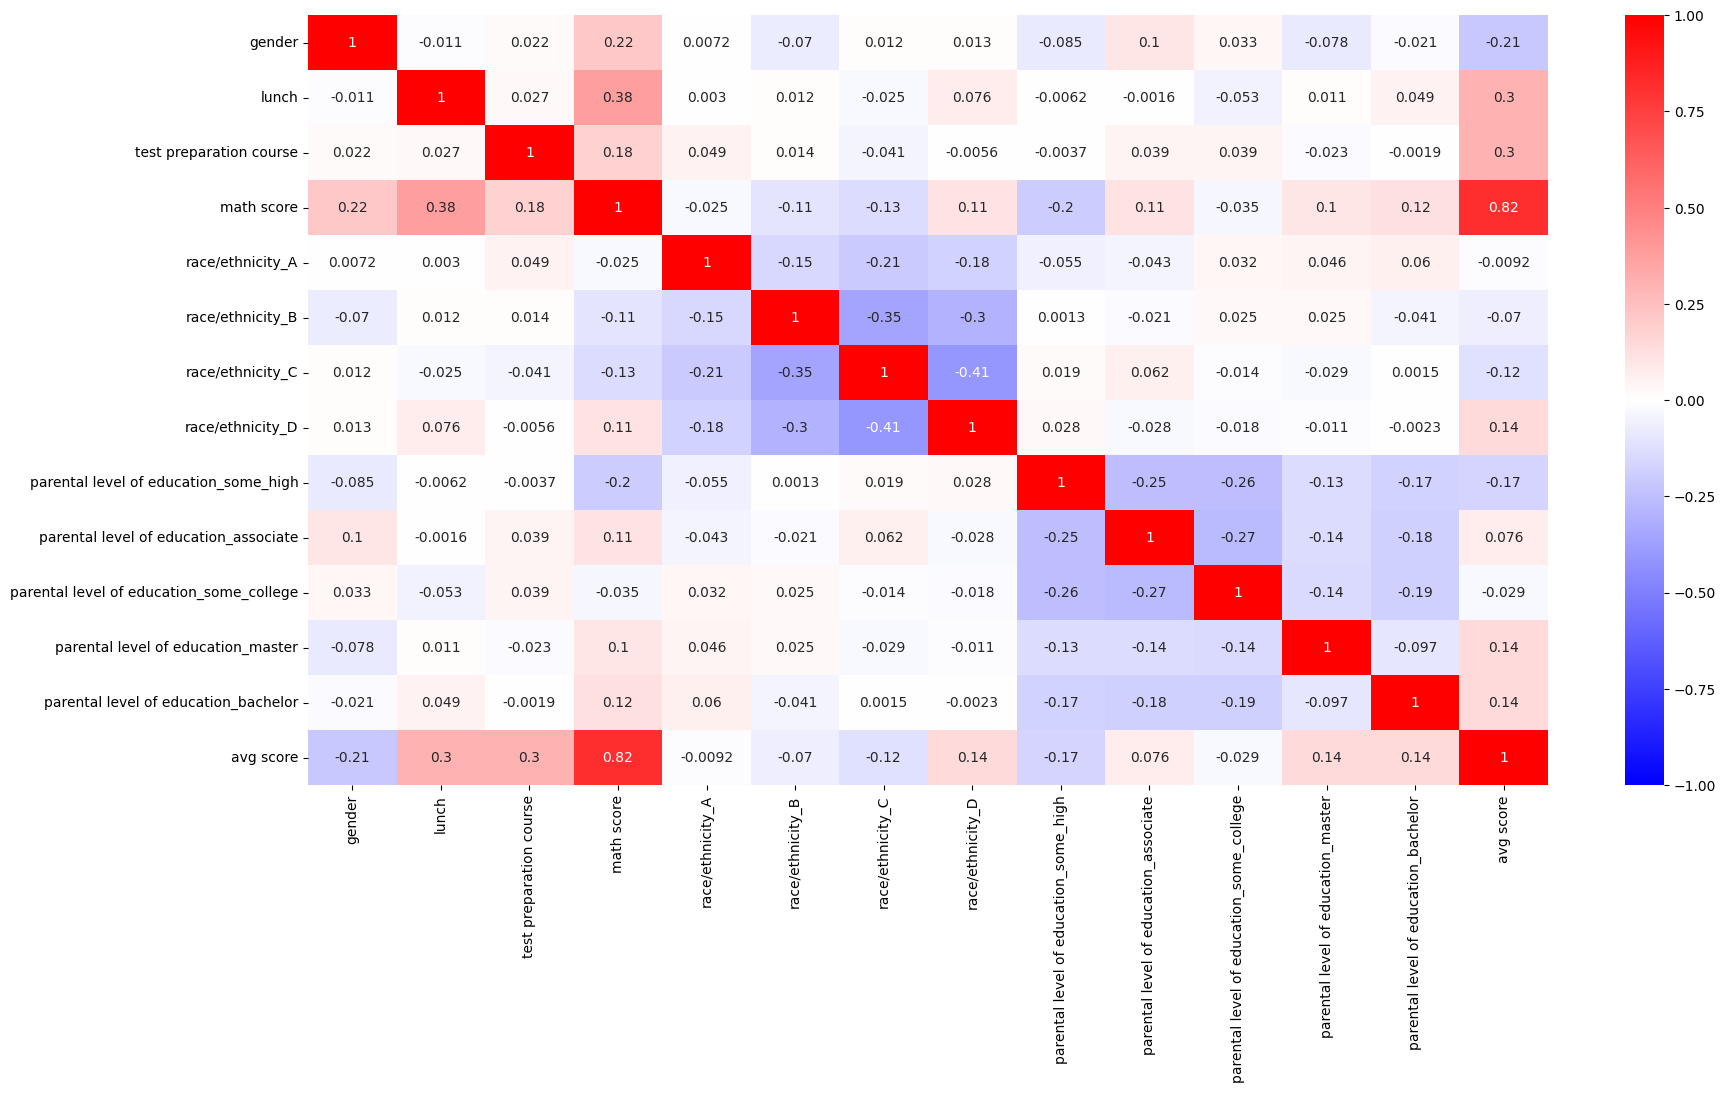

In [150]:
fig = plt.subplots(figsize=(20,10))

sns.heatmap(df_train.corr(), cmap='bwr', annot=True, vmax=1, vmin=-1, center=0)


In [151]:
#説明変数と目的変数に分割
X = df_train.drop("math score", axis=1)
y = df_train["math score"]

# 4.予測と評価

In [152]:
#重回帰(sklearn)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# スコア算出
from sklearn.metrics import r2_score,mean_squared_error
print("r2=",r2_score(y_true=y_test,y_pred=y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred)))
pd.DataFrame(lr.coef_,index=X.columns)

r2= 0.8644261343360617
RMSE= 5.4591972545044944


,0
gender,12.343449
lunch,4.228686
test preparation course,-3.526790
race/ethnicity_A,-5.189592
race/ethnicity_B,-5.508127
race/ethnicity_C,-5.297821
race/ethnicity_D,-5.537823
parental level of education_some_high,-0.848584
parental level of education_associate,-0.151306
parental level of education_some_college,-1.088491


In [153]:
#標準可変回帰係数を確認

# 標準化
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_std = ss.fit_transform(X)
X_std = pd.DataFrame(X_std,columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=2)

lr2 = LinearRegression()
lr2.fit(X_train,y_train)
y_pred = lr2.predict(X_test)

#標準化偏回帰係数を算出
pd.DataFrame(lr2.coef_,index=X_std.columns)

,0
gender,6.168941
lunch,2.006850
test preparation course,-1.657389
race/ethnicity_A,-1.426318
race/ethnicity_B,-2.222318
race/ethnicity_C,-2.480981
race/ethnicity_D,-2.429954
parental level of education_some_high,-0.335988
parental level of education_associate,-0.061291
parental level of education_some_college,-0.446093


r2= 0.7043638636617636
RMSE= 8.06156863698926


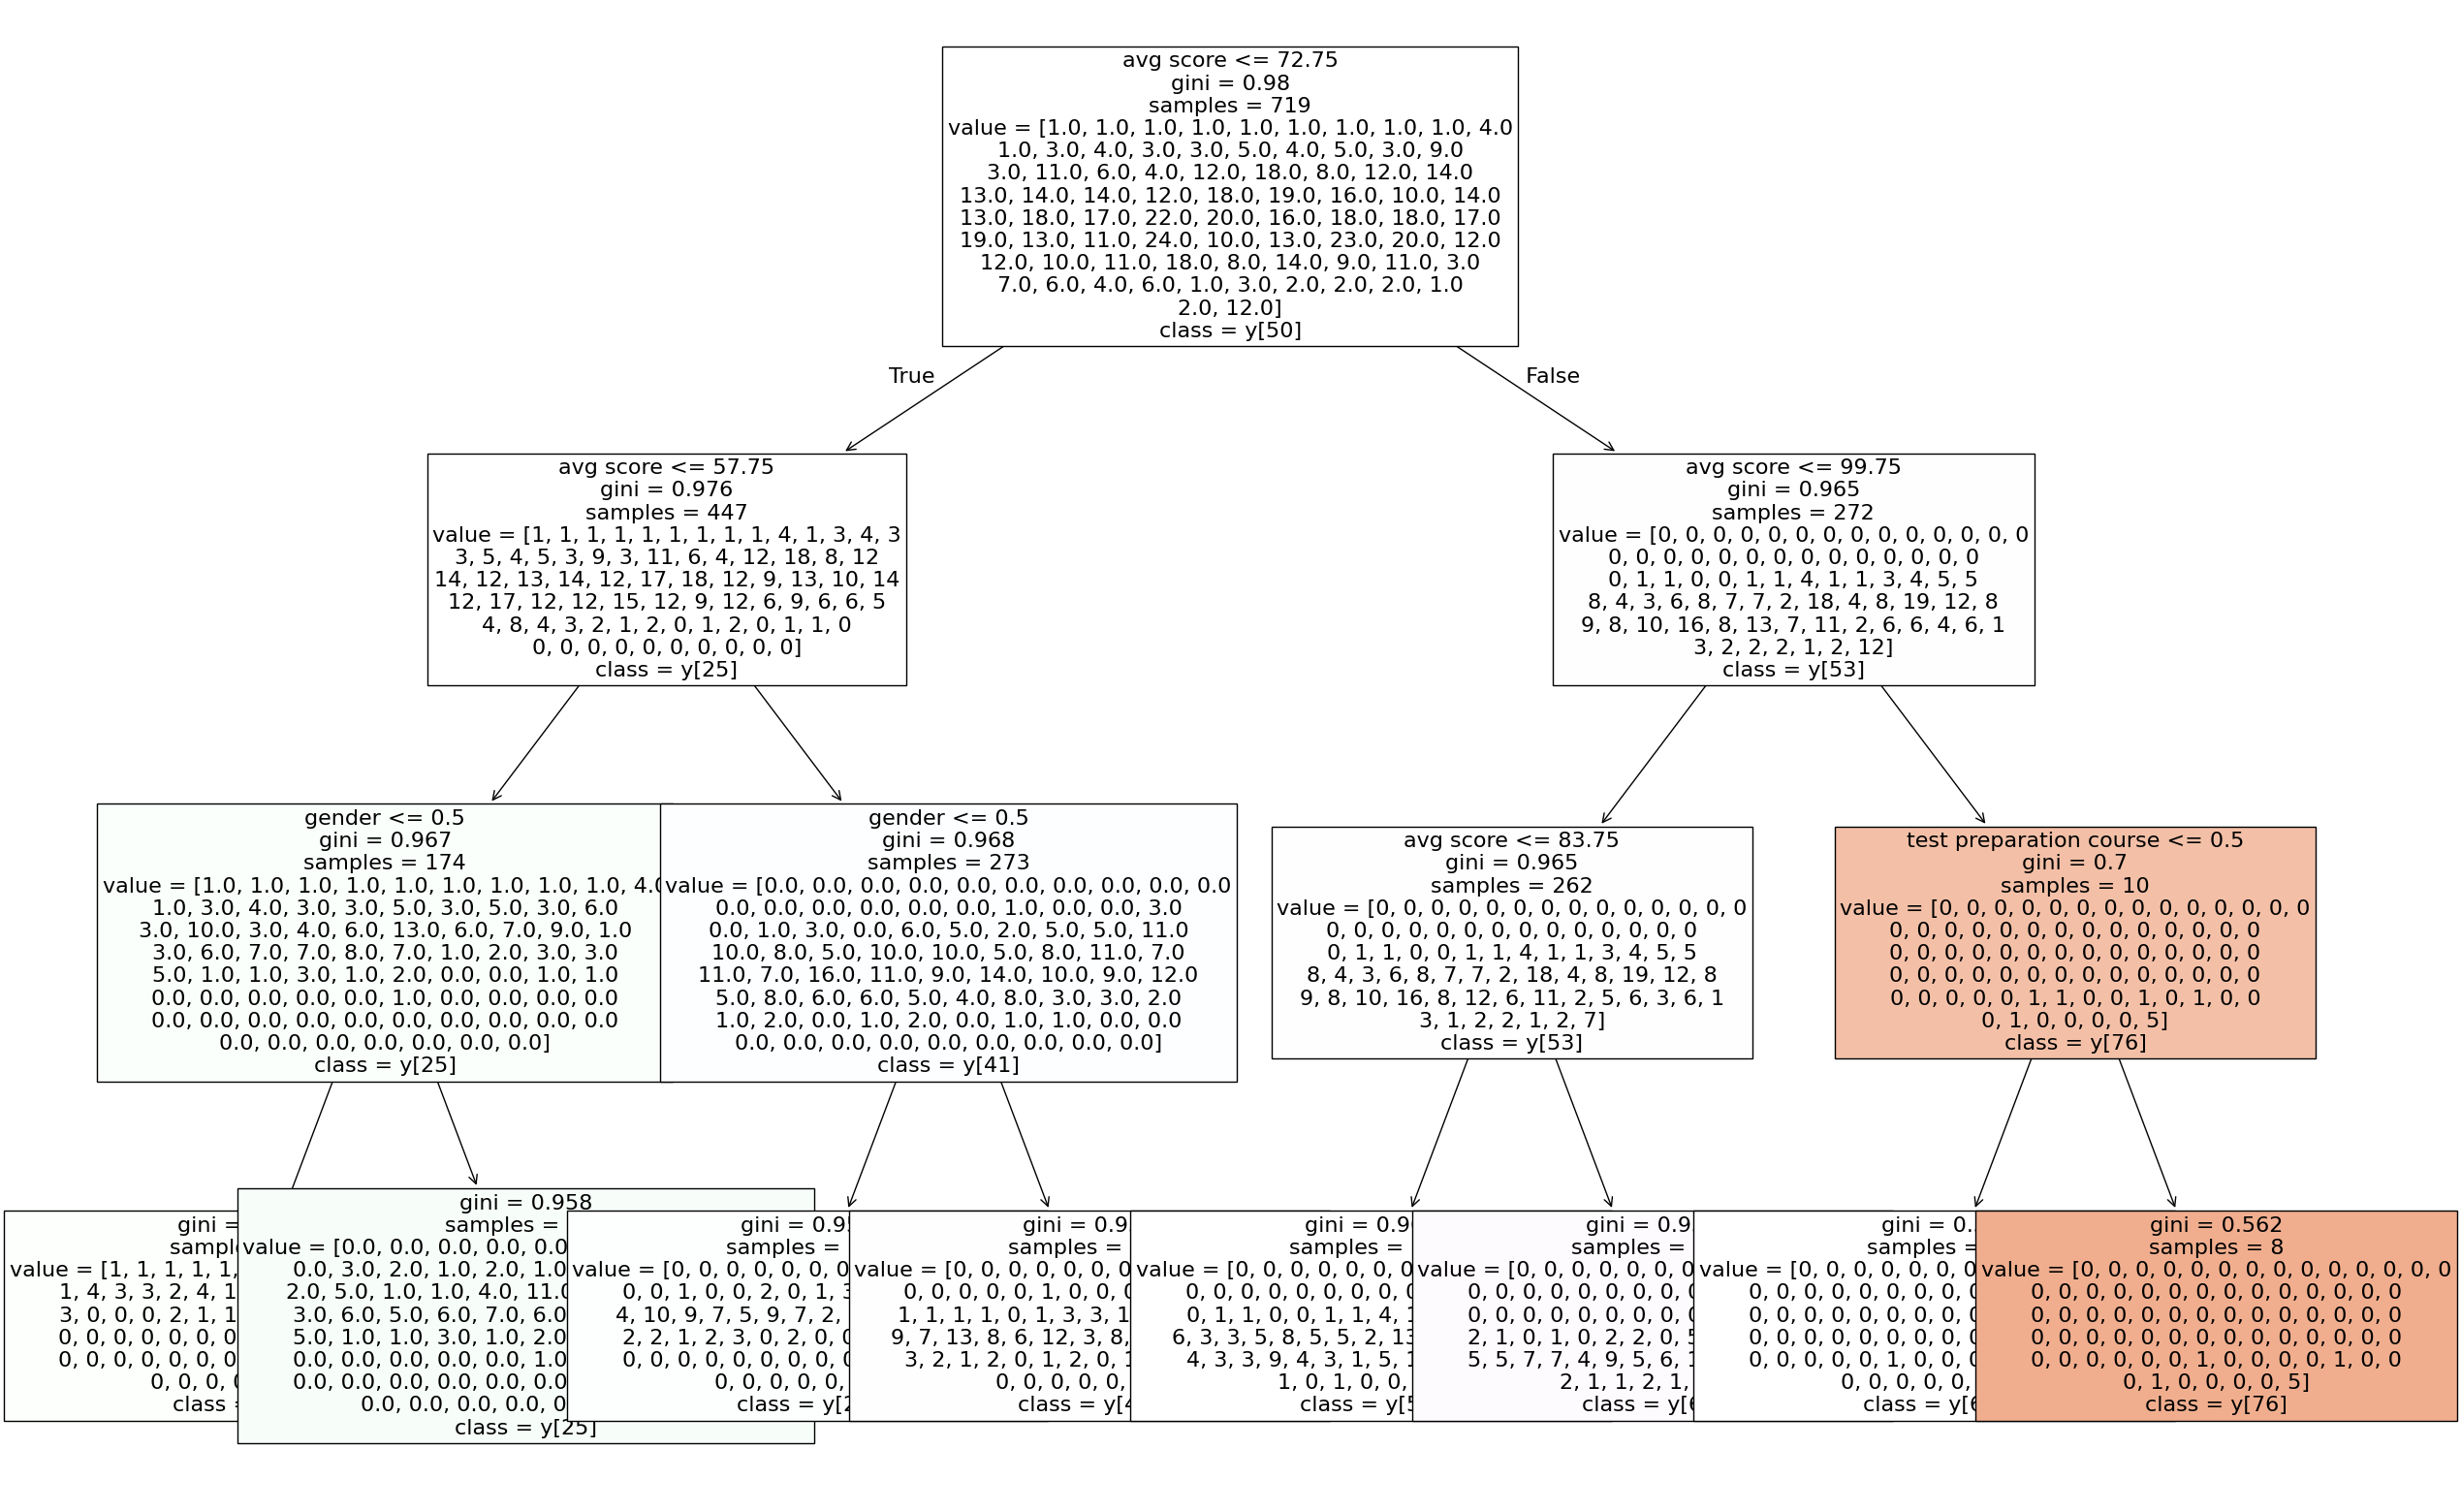

In [154]:
#決定木分析
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3) #max_depthを指定
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#スコア算出
from sklearn.metrics import r2_score,mean_squared_error
print("r2=", r2_score(y_true=y_test, y_pred=y_pred))
print("RMSE=", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
pd.DataFrame(lr.coef_, index=X.columns)

#可視化
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf, feature_names=X_train.columns, class_names=True, filled=True,fontsize=16);

In [155]:
#ベースラインモデル math scoreの平均値を代入して予測
y_pred = [np.mean(y_train)] * 180
print("RMSE=",np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred)))
#重回帰モデルのスコアがベースラインモデルを上回っていることを確認


RMSE= 14.853346149985441


In [156]:
#作成したモデルでテストデータを予測
X_test = df_test.drop("ID",axis=1)
pred = lr.predict(X_test)
df_test['y'] = pred
test_data = df_test[["ID","y"]].set_index("ID")
test_data.to_csv("submit.csv",index=True)
test_data

,y
ID,
510,80.918108
176,50.626439
480,77.516449
791,58.715474
268,53.684322
...,...
270,64.569556
544,77.427944
667,64.912669


In [158]:
#予測値が100を超えていないかを確認
test_data.max()

y    99.353115
dtype: float64